# Imports

In [1]:
from api.rest import QueryEngine

# Queries
- **band_gap_range**  
Range of bandgaps in *eV* as a two valued list eg. [1.2, 3.1]  
- **Formation_energy_range**  
Range of formation energies in *meV* as two values list eg. [50, 150]
- **elements**  
List of elements contained in entry eg. ['Na', 'Cl']  
note: this will return all entries that contain Na and Cl as well as any other element 
- **space_group_number**  
integer of space group number eg. 5
- **dimention**  
integer of dimension of material eg. 2
- **crystal_system**  
crystal system as a string eg. 'Tetragonal'  


In [2]:
qe = QueryEngine() 

a = qe.get_calculation(band_gap_range=[1,1.5], formation_energy_range=[124,150])

for e in a:
    if len(str(e).split('@')[0])< 8:
        print(str(e).split('@')[0] + '\t\t BandGap = \t' + str(round(e.band_gap,4)) + 
              ' eV\t Formation Eneergy = \t' + str(e.formation_energy)+ ' meV')
    else:
        print(str(e).split('@')[0] + '\t BandGap = \t' + str(round(e.band_gap,4)) +
              ' eV\t Formation Eneergy = \t' + str(e.formation_energy) + ' meV')

query info     band_gap_range: [1, 1.5]  formation_energy_range: [124, 150] elements: [] space_group_number: None dimension: None crystal_system: None
Pd2S4 		 BandGap = 	1.1746 eV	 Formation Eneergy = 	148.0 meV
Ge2Se2 		 BandGap = 	1.2107 eV	 Formation Eneergy = 	133.0 meV
Pt4I8 		 BandGap = 	1.4215 eV	 Formation Eneergy = 	135.0 meV
Pd4I8 		 BandGap = 	1.1512 eV	 Formation Eneergy = 	133.0 meV
MoO3 		 BandGap = 	1.1381 eV	 Formation Eneergy = 	136.0 meV


# Write Files

In [3]:
import os 
os.mkdir('example')
%cd example
for e in a:
    os.mkdir(e.entry.name)
    os.chdir(e.entry.name)
    e.write()
    os.chdir('..')
%ls
%cd ..
   


FileExistsError: [Errno 17] File exists: 'example'

In [ ]:
os.rmdir('example')


# Machine Learning Integration

In [ ]:
c = a.last()
c.get_soap()

In [ ]:
%cd /home/jason/dev/materialsweb
%rm -rf formation_energy

In [ ]:
c.prep_ml_formation_energy()
%ls

In [ ]:
c.entry.structure.lat_param_string()


In [4]:
from pymatgen import MPRester
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter
import os
from pymatgen.io.vasp import inputs
#os.mkdir('mldir')
#os.chdir('mldir')
a = MPRester('7JGUQgNZyOTTp8Tc')
entries = a.query('Cd-Te',properties = ['structure','formation_energy_per_atom'])
#entries = a.query('Cd-Te',properties = ['formation_energy_per_atom'])
formation_e_actual=[]
i= 0 
for b in entries:
    b['structure'].to(fmt='poscar',filename=str(i)+'.poscar')
    formation_e_actual.append(b['formation_energy_per_atom'])
    i = i +1 
entries = a.query('Cd',properties = ['structure','formation_energy_per_atom'])
for b in entries:
    b['structure'].to(fmt='poscar',filename=str(i)+'.poscar')
    formation_e_actual.append(b['formation_energy_per_atom'])
    i = i +1 
entries = a.query('Te',properties = ['structure','formation_energy_per_atom'])
for b in entries:
    b['structure'].to(fmt='poscar',filename=str(i)+'.poscar')
    formation_e_actual.append(b['formation_energy_per_atom'])
    i = i +1 


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
[-0.2826777850000002, -0.35400042333333354, -0.28274510500000005, -0.2933791050000001, -0.4606972275000003, -0.10257885499999997, 0.06771613999999992, 0.019554669999999774, -0.4637142999999999, -0.45802311750000024, 0.001414409999999977, 0.0, 0.0014720200000000183, 0.017789549999999932, 0.12278132750000026, 0.12740174000000026, 0.046555940000000184, 0.0, 2.4029999999915692e-05, 0.04365088666666672, 0.05410132000000001, 0.04913071499999999, 0.04706251750000012]


In [ ]:
%cd ..
%pwd
%ls

In [5]:
formation_e_predict=[]
model=qe.get_KRR('Cd-Te')
for i in range(0,23):
    #print(i)
    formation_e_predict.append(model.predict(qe.get_soap('./'+str(i)+'.poscar'))[0])
print(formation_e_predict)


http://10.5.46.39/static/models/Cd-Te.sav
././0.poscar
././1.poscar
././2.poscar
././3.poscar
././4.poscar
././5.poscar
././6.poscar
././7.poscar
././8.poscar
././9.poscar
././10.poscar
././11.poscar
././12.poscar
././13.poscar
././14.poscar
././15.poscar
././16.poscar
././17.poscar
././18.poscar
././19.poscar
././20.poscar
././21.poscar
././22.poscar
[-0.2345306884765801, -0.23756596240215133, -0.2517413380170951, -0.24755761868019177, -0.21340579726371633, -0.174576704233126, -0.1015552396174737, 0.004477855414455778, -0.21861336949718124, -0.21254714925762286, -0.03439547798190107, -0.09146698577491291, -0.041978300920243905, -0.05403810819080779, 0.12163482960658245, 0.27791645581802105, 0.1489733938814622, 0.15136123233625237, 0.15027820143149928, 0.142179602194758, 0.1361387019914332, 0.15660528984760114, 0.14949782832236092]


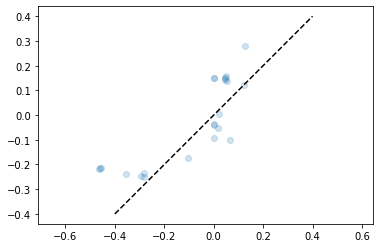

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(formation_e_actual, formation_e_predict, alpha=0.2)
plt.plot([-0.4, 0.4], [-0.4, 0.4], 'k--')
plt.axis('equal')
plt.show()

In [7]:
import numpy as np
print(np.sqrt(np.mean(np.subtract(formation_e_predict, formation_e_actual)**2)))

0.12654181694674277


In [10]:
for ab, cd in zip(formation_e_actual,formation_e_predict):
    print(str(ab)+'   '+ str(cd))

-0.2826777850000002   -0.2345306884765801
-0.35400042333333354   -0.23756596240215133
-0.28274510500000005   -0.2517413380170951
-0.2933791050000001   -0.24755761868019177
-0.4606972275000003   -0.21340579726371633
-0.10257885499999997   -0.174576704233126
0.06771613999999992   -0.1015552396174737
0.019554669999999774   0.004477855414455778
-0.4637142999999999   -0.21861336949718124
-0.45802311750000024   -0.21254714925762286
0.001414409999999977   -0.03439547798190107
0.0   -0.09146698577491291
0.0014720200000000183   -0.041978300920243905
0.017789549999999932   -0.05403810819080779
0.12278132750000026   0.12163482960658245
0.12740174000000026   0.27791645581802105
0.046555940000000184   0.1489733938814622
0.0   0.15136123233625237
2.4029999999915692e-05   0.15027820143149928
0.04365088666666672   0.142179602194758
0.05410132000000001   0.1361387019914332
0.04913071499999999   0.15660528984760114
0.04706251750000012   0.14949782832236092
